In [1]:
import os
import sv as SV
import numpy as np 
import astropy.table as atable
import astropy.io.fits as fits

from tqdm.notebook import tqdm, trange

# 21.7e version for Everest. 
from desispec.tsnr import tsnr2_to_efftime

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('Agg')
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
fuji_exps = SV.info_exposures(release='fuji')
guad_exps = SV.info_exposures(release='guadalupe') 

In [4]:
in_bright = (fuji_exps['FAPRGRM'] == 'bgsmws') | (fuji_exps['FAPRGRM'] == 'bright')
print("%i exposures in BRIGHT" % np.sum(in_bright))

sv1_exps = fuji_exps[(fuji_exps['SURVEY'] == 'sv1') & in_bright]
sv3_exps = fuji_exps[(fuji_exps['SURVEY'] == 'sv3') & in_bright]

print('%i SV1 BRIGHT exposure' % len(sv1_exps))
print('%i SV3 BRIGHT exposure' % len(sv3_exps))

in_bright = (guad_exps['FAPRGRM'] == 'bgsmws') | (guad_exps['FAPRGRM'] == 'bright')
main_exps = guad_exps[(guad_exps['SURVEY'] == 'main') & in_bright]
print('%i MAIN BRIGHT exposure' % len(main_exps))

897 exposures in BRIGHT
562 SV1 BRIGHT exposure
288 SV3 BRIGHT exposure
377 MAIN BRIGHT exposure


In [5]:
print('%i SV1 Tiles' % len(np.unique(sv1_exps['TILEID'])))
print('%i SV3 Tiles' % len(np.unique(sv3_exps['TILEID'])))
print('%i MAIN Tiles' % len(np.unique(main_exps['TILEID'])))

50 SV1 Tiles
214 SV3 Tiles
343 MAIN Tiles


Duration of each SV program 

In [6]:
sv1_exps['NIGHT'].min(), sv1_exps['NIGHT'].max()

(20201218, 20210402)

In [7]:
sv3_exps['NIGHT'].min(), sv3_exps['NIGHT'].max()

(20210405, 20210529)

In [8]:
main_exps['NIGHT'].min(), main_exps['NIGHT'].max()

(20210514, 20210709)

Text(0, 0.5, '$N_{\\rm exp}$')

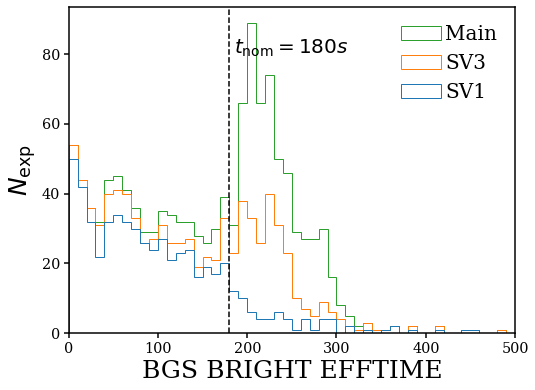

In [9]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_   = sub.hist([sv1_exps['BGS_EFFTIME_BRIGHT'], sv3_exps['BGS_EFFTIME_BRIGHT'], main_exps['BGS_EFFTIME_BRIGHT']], range=(0., 500), bins=50, stacked=True, label=['SV1', 'SV3', 'Main'], histtype='step')

sub.axvline(180, color='k', linestyle='--')
sub.text(185, 80, r'$t_{\rm nom}= 180s$', fontsize=20)

sub.legend(loc='upper right', fontsize=20, handletextpad=0.2)
sub.set_xlabel(r'BGS BRIGHT EFFTIME', fontsize=25)
sub.set_xlim(0., 500)
sub.set_ylabel(r'$N_{\rm exp}$', fontsize=25)

# Compile redrock files for SV exposures
We compile the redrock redshifts and 'true' redshifts for SV1, SV3, and main survey exposures with 160 < `BGS_EFFTIME_BRIGHT` < 200 (close to $t_{\rm nom} = 180s$).

For each exposure, I compile its redrock file and the redrock file of the deeper exposure, which will be used as the true redshift. For SV1, we use the cumulative exposures as truth. For SV3 and main, we use the healpix compiled exposures. 

In [10]:
def compile_rr(exps, survey, release='fuji'): 
    gals = [] 
    for i in trange(len(exps)): 
        _gals = SV.get_zbest_exp(exps['TILEID'][i], exps['EXPID'][i], release=release, survey=survey, ext_cols=[], exp_dX2=40.)
        gals.append(_gals)
    return atable.vstack(gals)

In [11]:
near_nom = (sv1_exps['BGS_EFFTIME_BRIGHT'] > 160) & (sv1_exps['BGS_EFFTIME_BRIGHT'] < 200)
print('%i exposures with 160 < BGS_EFFTIME_BRIGHT < 200' % np.sum(near_nom))

# compile redrock files
sv1_gals = compile_rr(sv1_exps[near_nom], 'sv1', release='fuji')

59 exposures with 160 < BGS_EFFTIME_BRIGHT < 200


  0%|          | 0/59 [00:00<?, ?it/s]

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/m

Text(0.5, 0, 'EXP. EFFTIME SPEC')

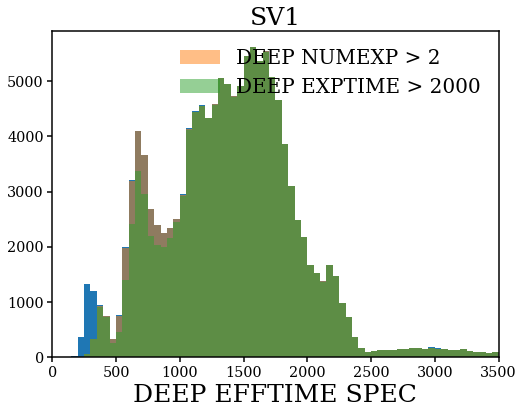

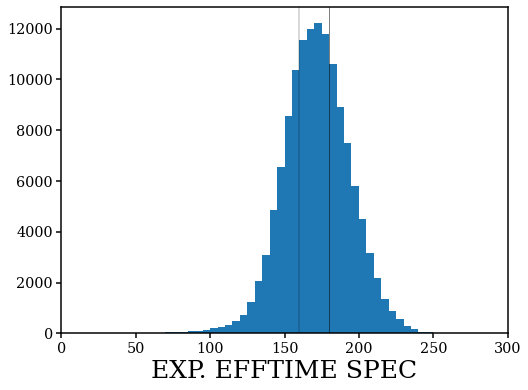

In [12]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_ = sub.hist(sv1_gals['DEEP_EFFTIME_SPEC'], bins=np.arange(0.0, 1.e4, 50.))
_ = sub.hist(sv1_gals['DEEP_EFFTIME_SPEC'][sv1_gals['DEEP_NUMEXP'] > 2], bins=np.arange(0.0, 1.e4, 50.), alpha=0.5, label='DEEP NUMEXP > 2')
_ = sub.hist(sv1_gals['DEEP_EFFTIME_SPEC'][sv1_gals['DEEP_EXPTIME'] > 2000.], bins=np.arange(0.0, 1.e4, 50.), alpha=0.5, label='DEEP EXPTIME > 2000')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlim(0.0, 3.5e3)
sub.set_xlabel('DEEP EFFTIME SPEC', fontsize=25)
sub.set_title('SV1', fontsize=25)

fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_ = sub.hist(sv1_gals['EFFTIME_SPEC'], bins=np.arange(0.0, 4.e2, 5.))

sub.axvline(180., c='k', lw=0.5)
sub.axvline(160., c='k', lw=0.3)

sub.set_xlim(0.0, 300.)
sub.set_xlabel('EXP. EFFTIME SPEC', fontsize=25)

In [13]:
near_nom = (sv3_exps['BGS_EFFTIME_BRIGHT'] > 160) & (sv3_exps['BGS_EFFTIME_BRIGHT'] < 200)
print('%i SV3 exposures with 160 < BGS_EFFTIME_BRIGHT < 200' % np.sum(near_nom))

sv3_gals = compile_rr(sv3_exps[near_nom], survey='sv3', release='fuji')

56 SV3 exposures with 160 < BGS_EFFTIME_BRIGHT < 200


  0%|          | 0/56 [00:00<?, ?it/s]

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/m

Text(0.5, 0, 'EXP. EFFTIME SPEC')

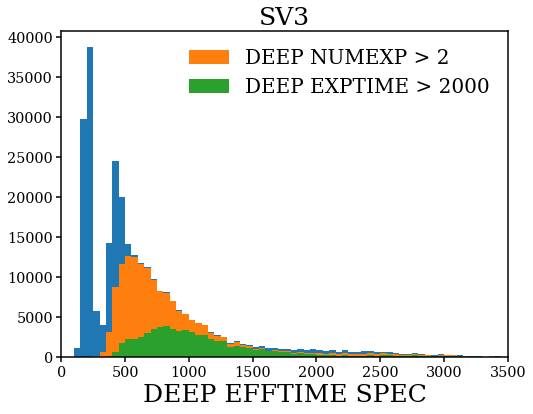

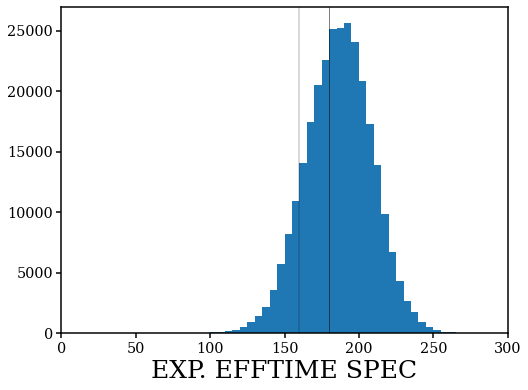

In [14]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_ = sub.hist(sv3_gals['DEEP_EFFTIME_SPEC'], bins=np.arange(0.0, 1.e4, 50.))
_ = sub.hist(sv3_gals['DEEP_EFFTIME_SPEC'][sv3_gals['DEEP_NUMEXP'] > 2], bins=np.arange(0.0, 1.e4, 50.), label='DEEP NUMEXP > 2')
_ = sub.hist(sv3_gals['DEEP_EFFTIME_SPEC'][sv3_gals['DEEP_EXPTIME'] > 2000.], bins=np.arange(0.0, 1.e4, 50.), label='DEEP EXPTIME > 2000')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlim(0.0, 3.5e3)
sub.set_xlabel('DEEP EFFTIME SPEC', fontsize=25)
sub.set_title('SV3', fontsize=25)

fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_ = sub.hist(sv3_gals['EFFTIME_SPEC'], bins=np.arange(0.0, 4.e2, 5.))

sub.axvline(180., c='k', lw=0.5)
sub.axvline(160., c='k', lw=0.3)

sub.set_xlim(0.0, 300.)
sub.set_xlabel('EXP. EFFTIME SPEC', fontsize=25)

In [ ]:
# save compiled zsuccess rates to file
dat_dir = '/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/'

sv1_gals.write(os.path.join(dat_dir,  'sv1.bgs_exps.efftime160_200.zsuccess.fuji.fits'), overwrite=True)
sv3_gals.write(os.path.join(dat_dir,  'sv3.bgs_exps.efftime160_200.zsuccess.fuji.fits'), overwrite=True)

# Compile Main Survey Exposures

In [11]:
near_nom = (main_exps['BGS_EFFTIME_BRIGHT'] > 160) & (main_exps['BGS_EFFTIME_BRIGHT'] < 200)
print('%i MAIN exposures with 160 < BGS_EFFTIME_BRIGHT < 200' % np.sum(near_nom))
main_gals = compile_rr(main_exps[near_nom], 'main', release='guadalupe')

51 MAIN exposures with 160 < BGS_EFFTIME_BRIGHT < 200


  0%|          | 0/51 [00:00<?, ?it/s]

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/master/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20211217-2.0.0/code/desimodel/m

Text(0.5, 0, 'EXP. EFFTIME SPEC')

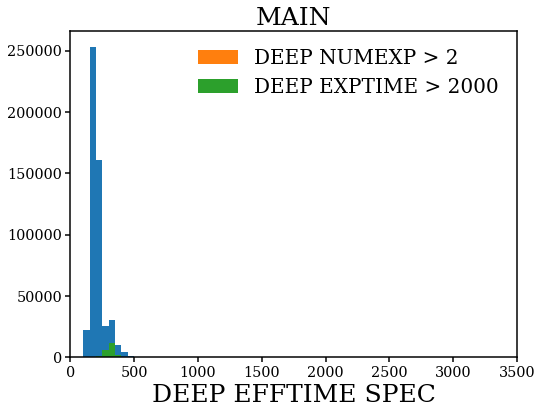

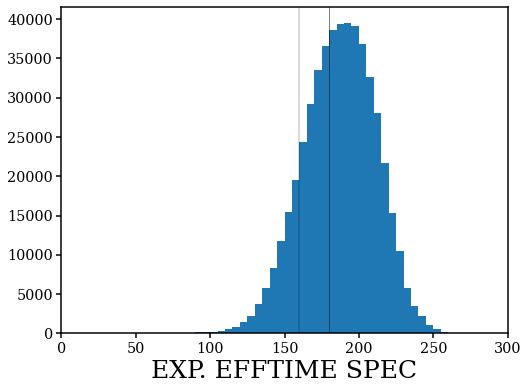

In [12]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_ = sub.hist(main_gals['DEEP_EFFTIME_SPEC'], bins=np.arange(0.0, 1.e4, 50.))
_ = sub.hist(main_gals['DEEP_EFFTIME_SPEC'][main_gals['DEEP_NUMEXP'] > 2], bins=np.arange(0.0, 1.e4, 50.), label='DEEP NUMEXP > 2')
_ = sub.hist(main_gals['DEEP_EFFTIME_SPEC'][main_gals['DEEP_EXPTIME'] > 2000.], bins=np.arange(0.0, 1.e4, 50.), label='DEEP EXPTIME > 2000')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlim(0.0, 3.5e3)
sub.set_xlabel('DEEP EFFTIME SPEC', fontsize=25)
sub.set_title('MAIN', fontsize=25)

fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_ = sub.hist(main_gals['EFFTIME_SPEC'], bins=np.arange(0.0, 4.e2, 5.))

sub.axvline(180., c='k', lw=0.5)
sub.axvline(160., c='k', lw=0.3)

sub.set_xlim(0.0, 300.)
sub.set_xlabel('EXP. EFFTIME SPEC', fontsize=25)

In [ ]:
dat_dir = '/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/'
main_gals.write(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.guadalupe.fits'), overwrite=True)

# Done.